
# 📘 Multiple Linear Regression Demonstration in Python
### Using Performance Index Data

---
## 🎯 Objectives
- Understand the concept of Multiple Linear Regression (MLR)
- Build an MLR model using Python (`statsmodels`)
- Interpret model coefficients and significance
- Evaluate model performance and validate assumptions
- Detect multicollinearity among predictors
- Perform predictions on new data with confidence intervals
- Compute standardized coefficients to compare variable importance
---



## 📊 Data Description

| Variable | Description | Type |
|-----------|--------------|------|
| `jpi` | Job Performance Index (dependent variable) | Continuous |
| `aptitude` | Aptitude Test Score | Continuous |
| `technical` | Technical Knowledge Score | Continuous |
| `general` | General Knowledge Score | Continuous |
| `tol` | Test Of Language Score | Continuous |

The aim is to model `jpi` as a function of the other variables.

---


In [1]:

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from scipy import stats

# Load data 
data = pd.read_csv('Performance Index.csv')
data.head()


,empid,jpi,aptitude,tol,technical,general
0,1,45.52,43.83,55.92,51.82,43.58
1,2,40.10,32.71,32.56,51.49,51.03
2,3,50.61,56.64,54.84,52.29,52.47
3,4,38.97,51.53,59.69,47.48,47.69
4,5,41.87,51.35,51.50,47.59,45.77


In [2]:
# Summary statistics
data.describe()

,empid,jpi,aptitude,tol,technical,general
count,33.00000,33.000000,33.000000,33.000000,33.00000,33.000000
mean,17.00000,47.865758,52.660606,53.990606,52.01697,49.036364
std,9.66954,9.458342,10.054991,10.149654,4.98145,5.636432
min,1.00000,31.640000,32.710000,32.560000,41.25000,37.000000
25%,9.00000,41.190000,45.590000,44.890000,48.34000,45.070000
50%,17.00000,49.450000,53.380000,57.040000,51.64000,50.530000
75%,25.00000,53.920000,56.750000,61.280000,54.68000,53.500000
max,33.00000,66.390000,75.030000,68.530000,67.27000,58.900000


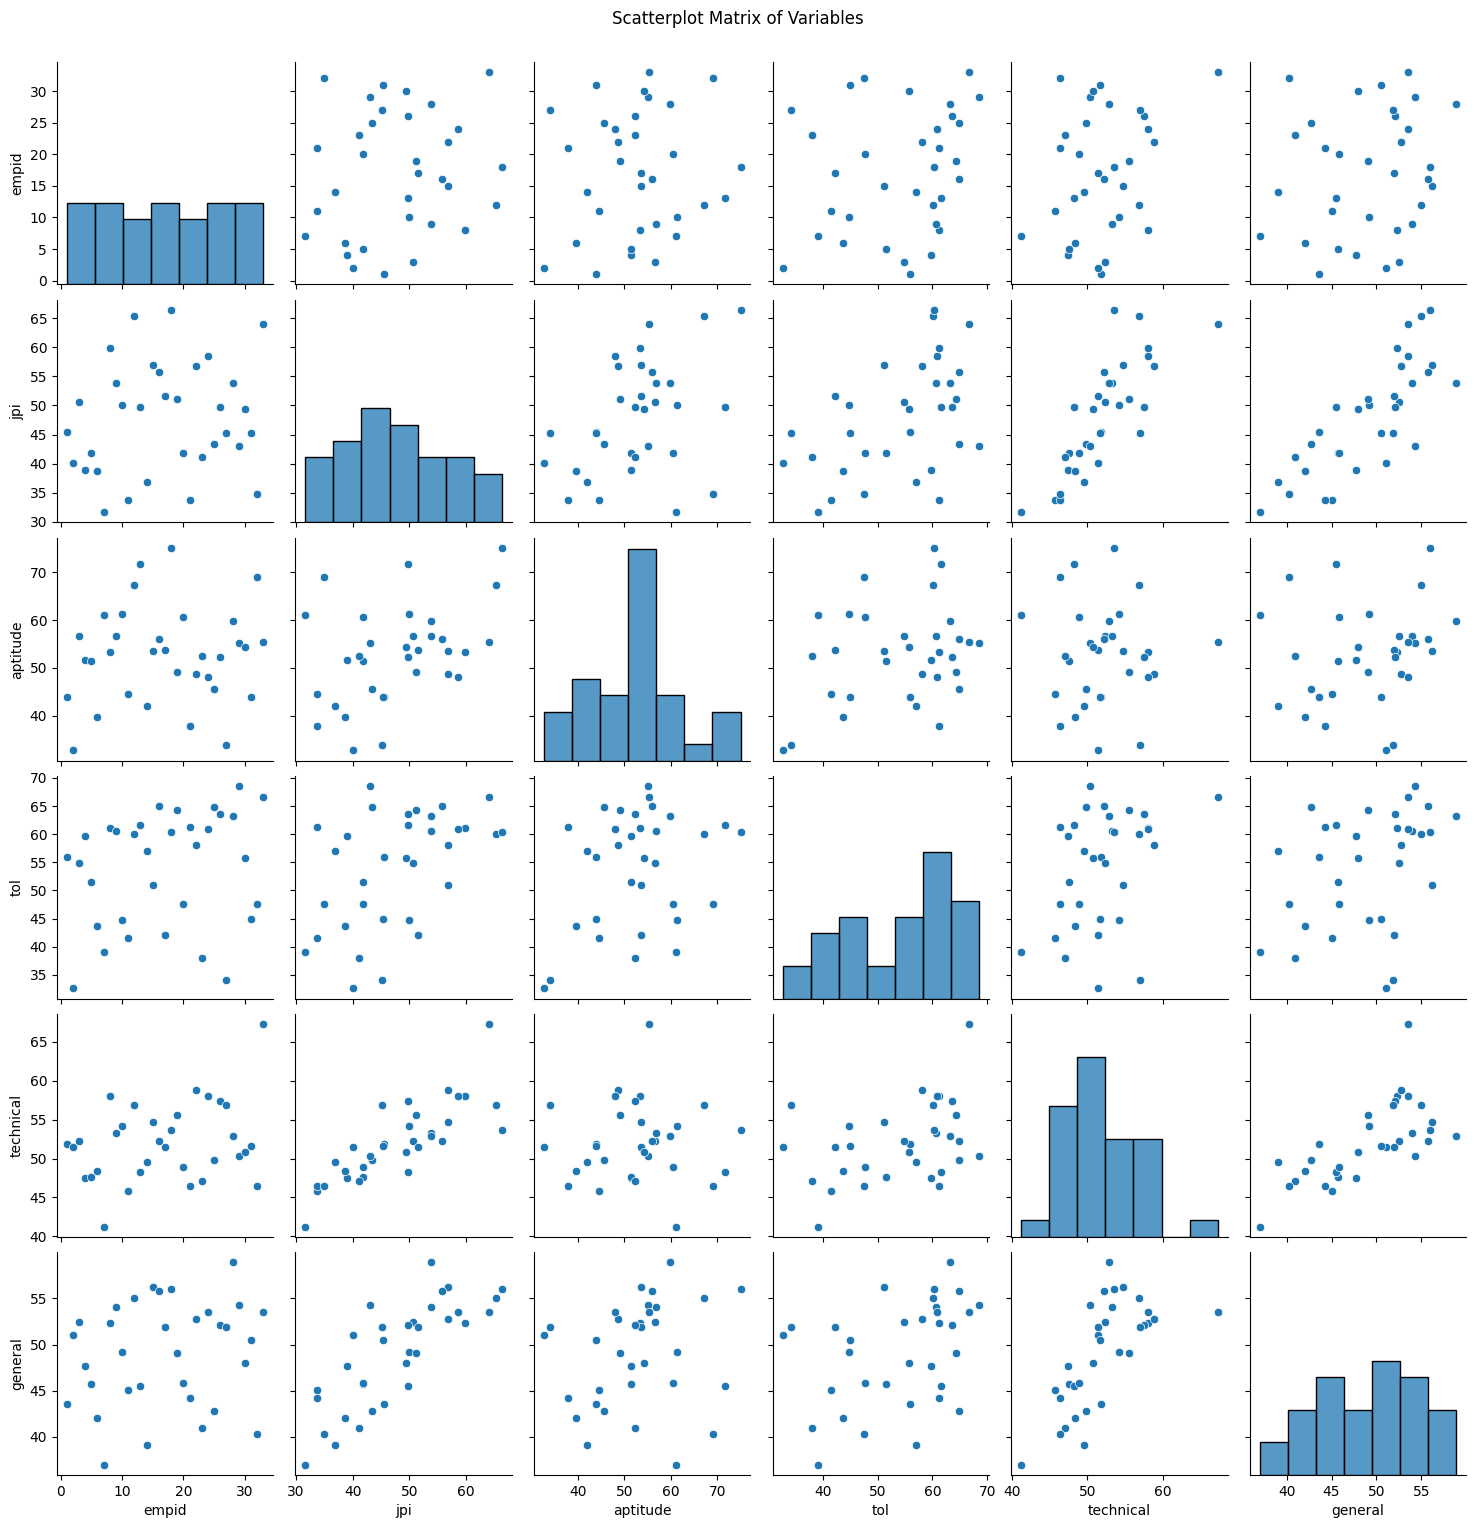

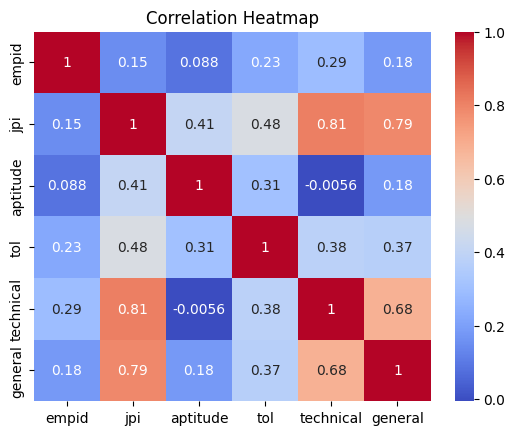

In [3]:
# Pairplot for bivariate relationships
sns.pairplot(data)
plt.suptitle("Scatterplot Matrix of Variables", y=1.02)
plt.show()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## 🧮 Model Building: Multiple Linear Regression
We’ll use the **Ordinary Least Squares (OLS)** method to fit the regression model:


In [4]:
# Model fitting
model = ols('jpi ~ aptitude + technical + general + tol', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    jpi   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     49.81
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           2.47e-12
Time:                        12:03:35   Log-Likelihood:                -85.916
No. Observations:                  33   AIC:                             181.8
Df Residuals:                      28   BIC:                             189.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.2822      7.395     -7.341      0.0


### Interpretation
- Coefficients (`params`) indicate the direction and magnitude of each variable’s effect on JPI.
- p-values < 0.05 indicate statistically significant predictors.
- Adjusted R² measures model fit considering the number of predictors.



## ⚙️ Detecting Multicollinearity (VIF)
Variance Inflation Factor (VIF) helps check correlation among predictors.


In [12]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('jpi ~ aptitude + technical + general + tol', data=data, return_type='dataframe')
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Variable,VIF
0,Intercept,143.239081
1,aptitude,1.179906
2,technical,2.073907
3,general,2.024968
4,tol,1.328205


As VIF's < 5, no multicollinearity detected

In [5]:
# Remove insignificant variable (tol) and refit model
model2 = ols('jpi ~ aptitude + technical + general', data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    jpi   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     68.18
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           3.03e-13
Time:                        12:03:35   Log-Likelihood:                -86.045
No. Observations:                  33   AIC:                             180.1
Df Residuals:                      29   BIC:                             186.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.4064      7.290     -7.464      0.0


### Interpretation
- Variables `aptitude`, `technical`, and `general` are significant.
- `tol` was dropped due to insignificance.
- Improved model has a higher Adjusted R² and better interpretability.



## 🔍 Residual Analysis
To validate model assumptions of normality and homoscedasticity.


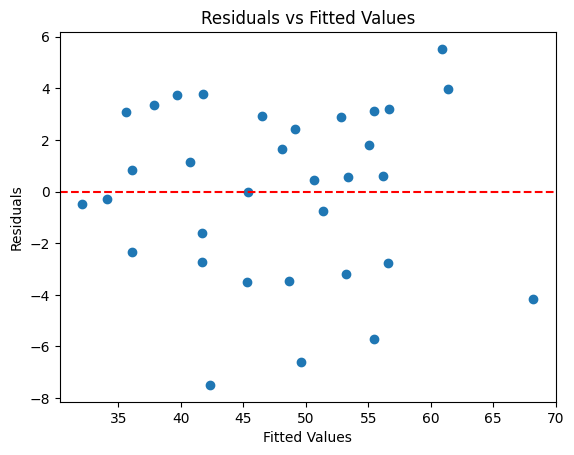

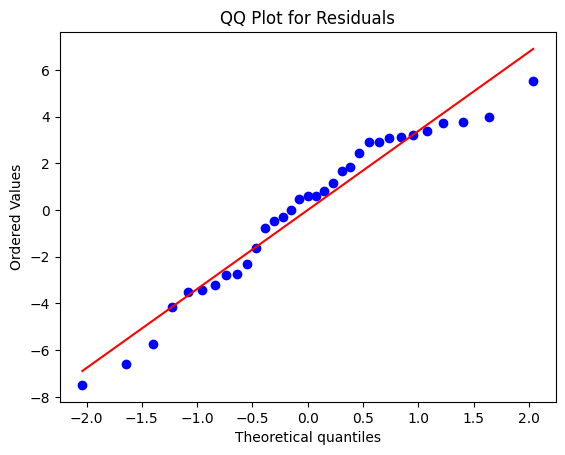

Shapiro-Wilk Test Statistic=0.9526, p-value=0.1588
✅ Residuals appear normally distributed (fail to reject H0)


In [6]:

# Add fitted values and residuals
data['fitted'] = model2.fittedvalues
data['residuals'] = model2.resid

# Residual vs Predicted plot
plt.scatter(data['fitted'], data['residuals'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# QQ Plot
stats.probplot(data['residuals'], dist="norm", plot=plt)
plt.title("QQ Plot for Residuals")
plt.show()

# Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(data['residuals'])
print(f'Shapiro-Wilk Test Statistic={stat:.4f}, p-value={p:.4f}')
if p > 0.05:
    print("✅ Residuals appear normally distributed (fail to reject H0)")
else:
    print("⚠️ Residuals deviate from normality (reject H0)")



## 📈 Predictions on test data


In [8]:
# Load test dataset
newdata = pd.read_csv('Performance Index new.csv')

#Predictions
newdata['pred'] = model2.predict(newdata)

newdata

,empid,jpi,tol,technical,general,aptitude,pred
0,34,66.35,59.20,57.18,54.98,66.74,61.552576
1,35,56.10,64.92,52.51,55.78,55.45,53.008978
2,36,48.95,63.59,57.76,52.08,51.73,55.621537
3,37,43.25,64.90,50.13,42.75,45.09,39.820600
4,38,41.20,51.50,47.89,45.77,50.85,40.879766
5,39,50.24,55.77,51.13,47.98,53.86,46.701385


In [9]:
# Predictions with confidence intervals
result = model2.get_prediction(newdata)
result.conf_int()

array([[59.00955719, 64.09559387],
       [50.67791702, 55.34003898],
       [53.65401364, 57.58906082],
       [37.73389546, 41.90730465],
       [39.23363549, 42.52589584],
       [45.41626758, 47.98650295]])


## 📏 Standardized Coefficients
Compare relative importance of predictors by standardizing them (Z-scores).


In [11]:
# Standardize numeric variables
data_std = data.select_dtypes(include=[np.number]).apply(stats.zscore).dropna()

# Fit standardized model
std_model = ols('jpi ~ aptitude + technical + general', data=data_std).fit()
print(std_model.params)

Intercept   -9.283428e-16
aptitude     3.543742e-01
technical    5.880966e-01
general      3.236793e-01
dtype: float64



### Interpretation
A 1 SD change in `technical` has the largest effect on `jpi`, followed by `aptitude` and `general`.

---
## ✅ Conclusion
- Model successfully explains variation in Job Performance Index.
- Technical skill contributes most to performance.
- Model assumptions (normality, no multicollinearity) are satisfied.
- Predictions can be made with reasonable confidence intervals.
